In [4]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [6]:
df = pd.read_csv('EWMAX.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.3+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max()-df.Date.min()).days} days')

Dataframe contains stock prices between 2000-03-27 00:00:00 2017-09-08 00:00:00
Total days = 6374 days


In [11]:
df.describe()

,Date,Open,High,Low,Close,Adj_Close,Volume
count,4392,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03
mean,2008-12-18 18:38:21.639344128,30.562539,30.893618,30.238833,30.572580,30.572580,1.884027e+06
min,2000-03-27 00:00:00,3.296875,3.390625,3.000000,3.250000,3.250000,1.904000e+05
25%,2004-08-10 18:00:00,8.718125,8.803125,8.625000,8.712500,8.712500,1.088800e+06
50%,2008-12-17 12:00:00,14.766250,14.981250,14.662500,14.767500,14.767500,1.539300e+06
75%,2013-05-01 06:00:00,42.546248,43.051249,42.086249,42.539999,42.539999,2.188900e+06
max,2017-09-08 00:00:00,121.080002,121.750000,120.169998,121.360001,121.360001,4.641260e+07
std,NaN,29.914758,30.210974,29.615761,29.905778,29.905778,1.621609e+06


Open        Axes(0.125,0.53;0.352273x0.35)
High     Axes(0.547727,0.53;0.352273x0.35)
Low         Axes(0.125,0.11;0.352273x0.35)
Close    Axes(0.547727,0.11;0.352273x0.35)
dtype: object

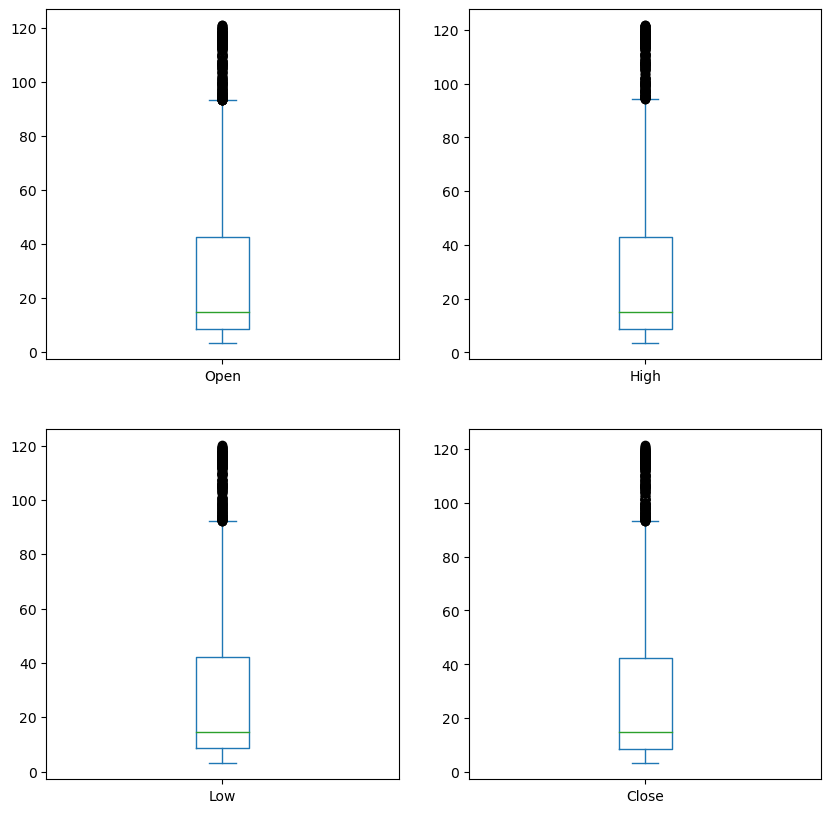

In [12]:
df[['Open', 'High', 'Low', 'Close']].plot(kind='box', subplots=True, figsize=(10,10), layout=(2,2))

In [13]:
df_data = [{'x':df['Date'], 'y': df['Close']}]
plot = go.Figure(data=df_data)
plot.update_layout(title='Closing Price', xaxis_title='Date', yaxis_title='Closing Price')
plot.show()

In [14]:
iplot(plot)

In [15]:
pip install keras

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install tensorflow

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [19]:
X = np.array(df.index).reshape(-1,1)
Y = df['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=110)

In [20]:
scaler = StandardScaler().fit(X_train)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm= LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [23]:
trace0 = go.Scatter(x=X_train.T[0], y=Y_train, mode='markers', name='Training Data')
trace1 = go.Scatter(x=X_test.T[0], y=Y_test, mode='markers', name='Testing Data')


df_data = [trace0, trace1]
plot = go.Figure(data=df_data)
plot.update_layout(title='Closing Price', xaxis_title='Date', yaxis_title='Closing Price')
plot.show()

In [24]:
iplot(plot)

In [25]:
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.7528861534401794	0.7529906267435282
MSE       222.19721680971537	217.821767849839

